<a href="https://colab.research.google.com/github/MoniMG/Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación / Instalación de bibliotecas-Librerias

---



In [33]:
import pandas as pd
!pip install matplotlib #Comando para instalar libreria
import matplotlib.pyplot as plt
import numpy as np
import folium

### Importación de datos



In [34]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [ ]:
# Añadir una columna de identificación de tienda
tienda['Tienda'] ='Tienda1'
tienda2['Tienda'] ='Tienda2'
tienda3['Tienda'] ='Tienda3'
tienda4['Tienda'] ='Tienda4'
tienda['Tienda'].head()

,Tienda
0,Tienda1
1,Tienda1
2,Tienda1
3,Tienda1
4,Tienda1


 La facturación de Tienda1 es de $1,150,880,400.0
 La facturación de Tienda2 es de $1,116,343,500.0
 La facturación de Tienda3 es de $1,098,019,600.0
 La facturación de Tienda4 es de $1,038,375,700.0
La facturacion total de las tiendas es 4403619200.0


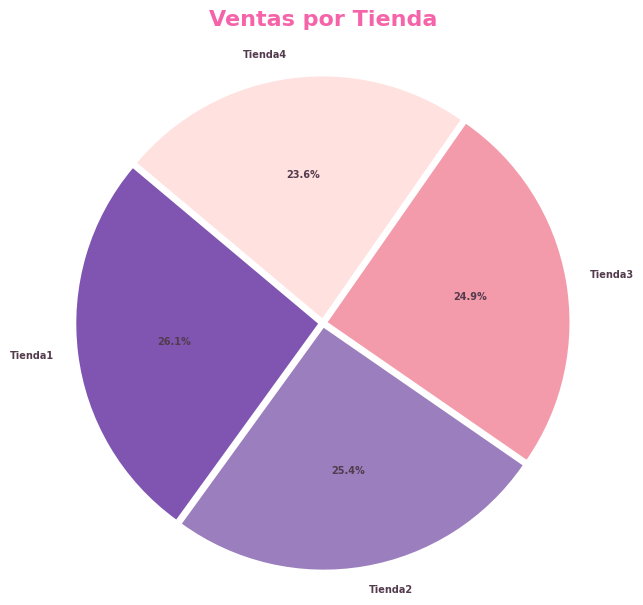

In [ ]:
#Definición de variables para utilizar en el código
TotalFacturacion = []
FacturacionTiendas = []
Facturacion = 0
Tiendas = [tienda,tienda2,tienda3,tienda4]
# Iteración de total de facturación
for tnd in Tiendas:
  SumaTotal = sum(tnd['Precio'])
  Facturacion +=SumaTotal
  print(f' La facturación de {tnd["Tienda"][1]} es de ${format(SumaTotal,",")}')
  FacturacionTiendas.append(tnd["Tienda"][1])
  TotalFacturacion.append(SumaTotal)

print(f'La facturacion total de las tiendas es {Facturacion}')

# Creación del gráfico
# Definiendo colores:
colores = ['#7F55B1','#9B7EBD','#F49BAB','#FFE1E0']

# Crear el gráfico
plt.figure(figsize=(7,7))  # Tamaño del gráfico
plt.pie(TotalFacturacion,
        labels= FacturacionTiendas,
        colors=colores,
        autopct='%1.1f%%',        # Mostrar porcentaje con 1 decimal
        startangle=140,           # Ángulo de inicio
      # shadow=True,              # Sombra
        explode=(0.02, 0.02, 0.02, 0.02),# Separar algunas secciones
       textprops=dict(color="#533B4D", fontsize=7, weight='bold') # Estilo del texto
        )

# Título con estilo
plt.title('Ventas por Tienda',
          fontsize=16,
          fontweight='bold',
          color='#F564A9',
          loc='center',
          pad=20)

plt.axis('equal')  # Mantiene el círculo proporcional
plt.show()


# 2. Ventas por categoría

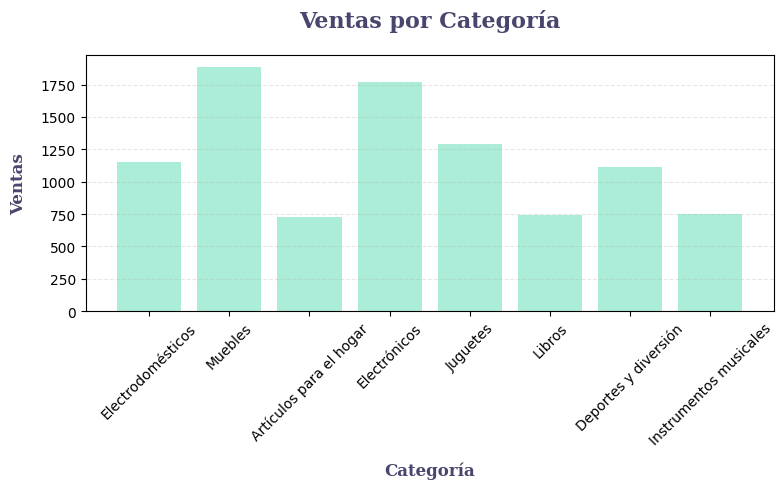

In [ ]:
# Unimos nuevamente las tiendas para trabajarlas en conjunto
tiendas2 = pd.concat([tienda,tienda2,tienda3,tienda4])

#categorias = tiendas2['Categoría del Producto'].unique().tolist()
categorias_unicas = list(set(tiendas2['Categoría del Producto']))
#print(categorias_unicas) # Verificando las categorias

# Creando una lista de listas con valores repetidos de cada estado
lista_de_categorias = []
for categoria in categorias_unicas:
    lista = [e for e in tiendas2['Categoría del Producto'] if e == categoria]
    lista_de_categorias.append(lista)

# Ventas totales por categoría
conteo_categorias = {categorias_unicas[i]: len(lista_de_categorias[i]) for i in range(len(categorias_unicas))}
#print(conteo_categorias)

# Extraer claves y valores
categorias2 = list(conteo_categorias.keys())
ventasCategoria = list(conteo_categorias.values())

# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(categorias2, ventasCategoria, color='#ABEDD8')

# Agregar título y etiquetas

# Título con estilo
plt.title('Ventas por Categoría',
          fontsize=16,
          fontweight='bold',
          color='#48466D',
          loc='center',
          pad=20,
          fontname='serif')
#XLabel con Stylo
plt.xlabel('Categoría',
          fontsize=12,
          fontweight='bold',
          color='#48466D',
          loc='center',
          labelpad=10,
          fontname='serif'
          )
#YLabel con Stylo
plt.ylabel('Ventas',
          fontsize=12,
          fontweight='bold',
          color='#48466D',
          loc='center',
          labelpad=10,
          fontname='serif'
          )

plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Unimos las Tiendas pero usando funciones de Pandas
Tiendas = pd.concat([tienda,tienda2,tienda3,tienda4])

#Conteo por categoría
Ventas_cat = Tiendas.groupby(["Tienda","Categoría del Producto"]).agg(Cantidad_Ventas=('Tienda','count'))
Ventas_cat = Ventas_cat.reset_index()
Ventas_cat_pvt =Ventas_cat.pivot(index="Tienda",columns="Categoría del Producto",values="Cantidad_Ventas").reset_index()
Ventas_cat_pvt.head()


Categoría del Producto,Tienda,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
0,Tienda1,171,284,312,448,182,324,173,465
1,Tienda2,181,275,305,422,224,313,197,442
2,Tienda3,177,277,278,451,177,315,185,499
3,Tienda4,201,277,254,451,170,338,187,480


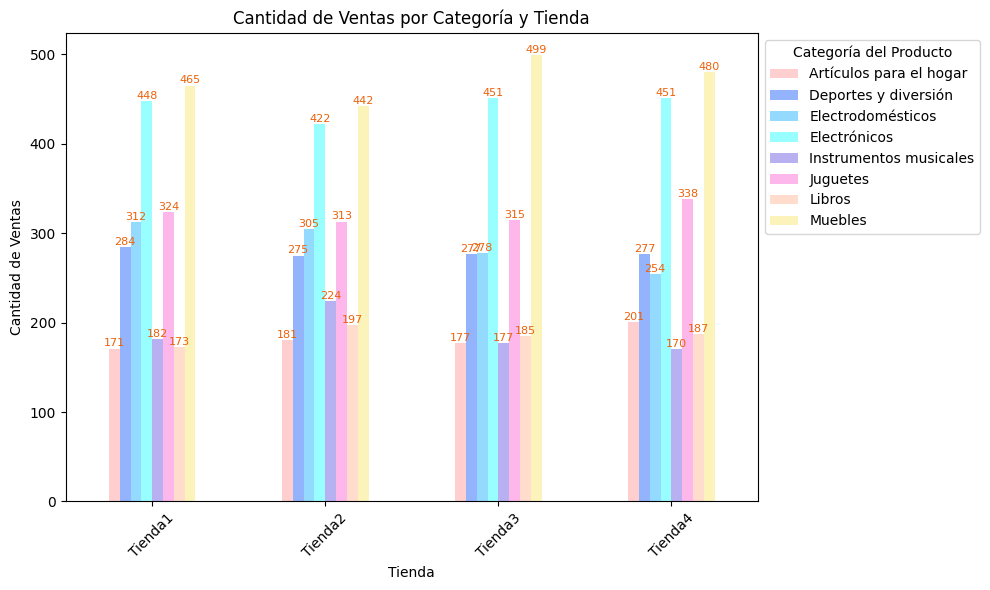

In [ ]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
colores = ['#FFCECE', '#94B3FD', '#94DAFF', '#99FEFF', '#B7B1F2','#FDB7EA','#FFDCCC','#FBF3B9']  # colores por categoría
ax = Ventas_cat_pvt.set_index("Tienda").plot(kind='bar', figsize=(10,6), color=colores)

# Título y etiquetas
plt.title("Cantidad de Ventas por Categoría y Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Categoría del Producto", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Agregar etiquetas a cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.1,
                round(height, 2),
                ha='center',
                va='bottom',
                fontsize=8,
                color='#EC610A')

# Mostrar gráfico
plt.show()


In [ ]:
# Ventas maximas

# Para cada tienda, obtener el índice de la fila con el mayor conteo de ventas
idx_max = Ventas_cat.groupby("Tienda")["Cantidad_Ventas"].idxmax()
idx_min = Ventas_cat.groupby("Tienda")["Cantidad_Ventas"].idxmin()

# Usar esos índices para obtener las filas correspondientes
productos_mas_vendidos = Ventas_cat.loc[idx_max].reset_index(drop=True)
productos_menos_vendidos = Ventas_cat.loc[idx_min].reset_index(drop=True)
print(productos_mas_vendidos)

print(f'\n {productos_menos_vendidos}')


    Tienda Categoría del Producto  Cantidad_Ventas
0  Tienda1                Muebles              465
1  Tienda2                Muebles              442
2  Tienda3                Muebles              499
3  Tienda4                Muebles              480

     Tienda   Categoría del Producto  Cantidad_Ventas
0  Tienda1  Artículos para el hogar              171
1  Tienda2  Artículos para el hogar              181
2  Tienda3  Artículos para el hogar              177
3  Tienda4   Instrumentos musicales              170


# 3. Calificación promedio de la tienda


Calificación Promedio de Tiendas : 
Tienda1 = 3.98
Tienda2 = 4.04
Tienda3 = 4.05
Tienda4 = 4.0


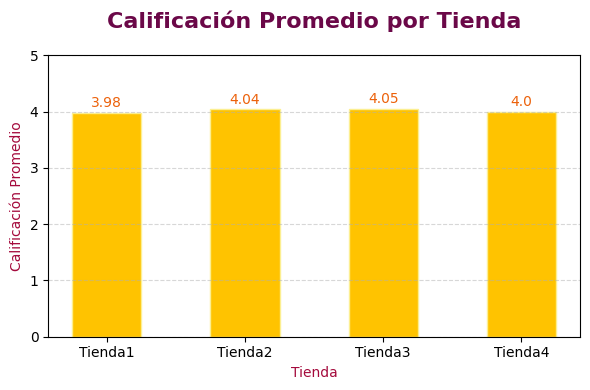

In [ ]:

Tiendas = [tienda,tienda2,tienda3,tienda4]
nombres_tiendas = []
promedios = []
print('Calificación Promedio de Tiendas : ' )
for tda in Tiendas:
  tda_fila = tda['Tienda'][0]
  Promedio = tda['Calificación'].mean()
  print(f'{tda_fila} = {round(Promedio,2)}')

 #Datos para los gráficos
  nombres_tiendas.append(tda_fila)
  promedios.append(Promedio)

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(nombres_tiendas, promedios, color='#FFC300',edgecolor = '#FCEF91', width = 0.5)


# Etiquetas y título
plt.title("Calificación Promedio por Tienda",
          fontsize=16,
          fontweight='bold',
          color='#6B0848',
          loc='center',
          pad=20)
plt.xlabel("Tienda",
          fontsize=10,
          #fontweight='bold',
          color='#A40A3C',
          loc='center')

plt.ylabel("Calificación Promedio",
          fontsize=10,
          #fontweight='bold',
          color='#A40A3C',
          loc='center')
plt.ylim(0, 5)  # Suponiendo que la escala es de 1 a 5
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar valores sobre las barras
for i, val in enumerate(promedios):
    plt.text(i, val + 0.05, round(val, 2), ha='center', va='bottom', color= '#EC610A')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
tiendas3 = pd.concat([tienda,tienda2,tienda3,tienda4])

Tienda 1
       Productos  Ventas
0     Microondas      60
1  TV LED UHD 4K      60
2        Armario      60
                   Productos  Ventas
0            Olla de presión      35
1  Auriculares con micrófono      33
2               Celular ABXY      33
Tienda 2
                   Productos  Ventas
0  Iniciando en programación      65
1                 Microondas      62
2                    Batería      61
         Productos  Ventas
0  Mesa de comedor      34
1        Impresora      34
2    Juego de mesa      32
Tienda 3
         Productos  Ventas
0    Kit de bancas      57
1  Mesa de comedor      56
2        Cama king      56
                 Productos  Ventas
0                  Mochila      36
1               Microondas      36
2  Bloques de construcción      35
Tienda 4
                 Productos  Ventas
0                 Cama box      62
1               Cubertería      59
2  Dashboards con Power BI      56
            Productos  Ventas
0   Guitarra acústica      37
1           

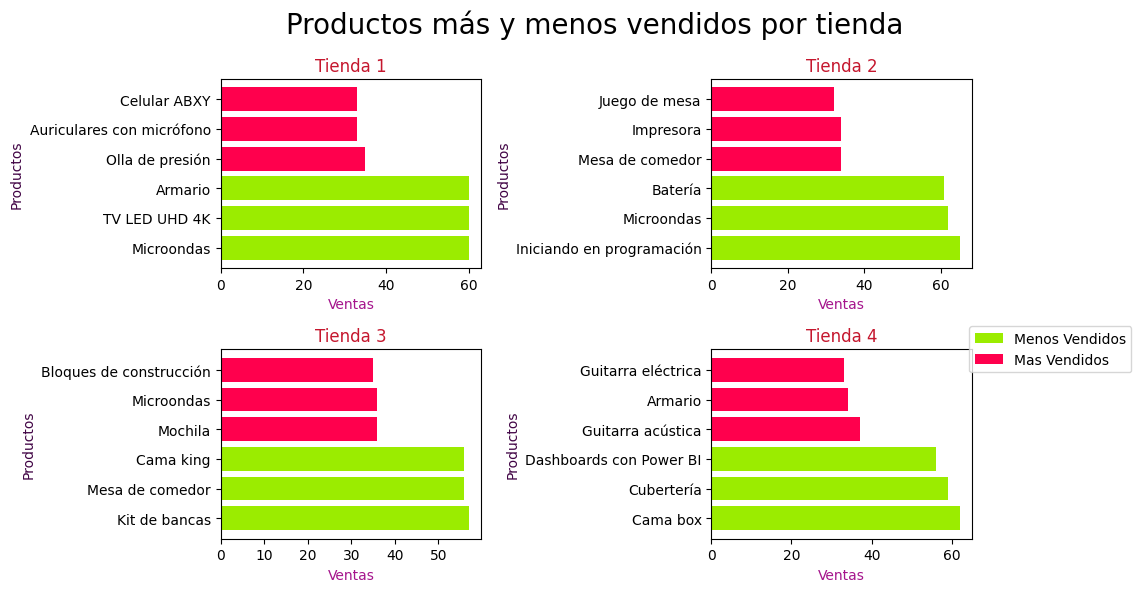

In [ ]:
#Tienda 1
print("Tienda 1")
productos = pd.Series(tienda['Producto'])
frecuencia = productos.value_counts()
productos_mas_vendidos = frecuencia.head(3).reset_index()
productos_mas_vendidos.columns = ["Productos", "Ventas"]
productos_menos_vendidos= frecuencia.tail(3).reset_index()
productos_menos_vendidos.columns = ["Productos", "Ventas"]
print(productos_mas_vendidos)
print(productos_menos_vendidos)

#Tienda 2
print("Tienda 2")
productos2 = pd.Series(tienda2['Producto'])
frecuencia2 = productos2.value_counts()
productos_mas_vendidos2 = frecuencia2.head(3).reset_index()
productos_mas_vendidos2.columns = ["Productos", "Ventas"]
productos_menos_vendidos2= frecuencia2.tail(3).reset_index()
productos_menos_vendidos2.columns = ["Productos", "Ventas"]
print(productos_mas_vendidos2)
print(productos_menos_vendidos2)

#Tienda 3
print("Tienda 3")
productos3 = pd.Series(tienda3['Producto'])
frecuencia3 = productos3.value_counts()
productos_mas_vendidos3 = frecuencia3.head(3).reset_index()
productos_mas_vendidos3.columns = ["Productos", "Ventas"]
productos_menos_vendidos3= frecuencia3.tail(3).reset_index()
productos_menos_vendidos3.columns = ["Productos", "Ventas"]
print(productos_mas_vendidos3)
print(productos_menos_vendidos3)

#Tienda 4
print("Tienda 4")
productos4 = pd.Series(tienda4['Producto'])
frecuencia4 = productos4.value_counts()
productos_mas_vendidos4 = frecuencia4.head(3).reset_index()
productos_mas_vendidos4.columns = ["Productos", "Ventas"]
productos_menos_vendidos4= frecuencia4.tail(3).reset_index()
productos_menos_vendidos4.columns = ["Productos", "Ventas"]
print(productos_mas_vendidos4)
print(productos_menos_vendidos4)


# Graficando todos en un solo grafíco

fig, axs = plt.subplots(2,2, figsize = (12,6))

axs[0,0].barh(productos_mas_vendidos['Productos'], productos_mas_vendidos["Ventas"], color = ['#9BEC00'])
axs[0,0].barh(productos_menos_vendidos['Productos'], productos_menos_vendidos['Ventas'], color = ['#FF004D'])
axs[0,0].set_xlabel("Ventas", color='#A5158C')
axs[0,0].set_ylabel("Productos", color='#410445')
axs[0,0].set_title("Tienda 1", color='#C5172E')

axs[0,1].barh(productos_mas_vendidos2['Productos'],productos_mas_vendidos2['Ventas'], color = ['#9BEC00'])
axs[0,1].barh(productos_menos_vendidos2['Productos'], productos_menos_vendidos2['Ventas'], color = ['#FF004D'])
axs[0,1].set_xlabel("Ventas", color='#A5158C')
axs[0,1].set_ylabel("Productos", color='#410445')
axs[0,1].set_title("Tienda 2", color='#C5172E')

axs[1,0].barh(productos_mas_vendidos3['Productos'], productos_mas_vendidos3['Ventas'], color = ['#9BEC00'])
axs[1,0].barh(productos_menos_vendidos3['Productos'], productos_menos_vendidos3['Ventas'], color = ['#FF004D'])
axs[1,0].set_xlabel("Ventas", color='#A5158C')
axs[1,0].set_ylabel("Productos", color='#410445')
axs[1,0].set_title("Tienda 3", color='#C5172E')

axs[1,1].barh(productos_mas_vendidos4['Productos'], productos_mas_vendidos4['Ventas'], color = ['#9BEC00'])
axs[1,1].barh(productos_menos_vendidos4['Productos'], productos_menos_vendidos4['Ventas'], color = ['#FF004D'])
axs[1,1].set_xlabel("Ventas", color='#A5158C')
axs[1,1].set_ylabel("Productos", color='#410445')
axs[1,1].set_title("Tienda 4", color='#C5172E')

plt.legend(["Menos Vendidos", "Mas Vendidos"], loc ='center', bbox_to_anchor=(1.3, 1))
plt.suptitle("Productos más y menos vendidos por tienda", fontsize = 20)
plt.tight_layout()
plt.show()





Tienda Total
Productos más vendidos a nivel total:
                   Productos  Ventas
0              Mesa de noche     210
1  Carrito de control remoto     206
2                 Microondas     206

Productos menos vendidos a nivel total:

                    Productos  Ventas
0                    Mochila     163
1  Auriculares con micrófono     158
2               Celular ABXY     157


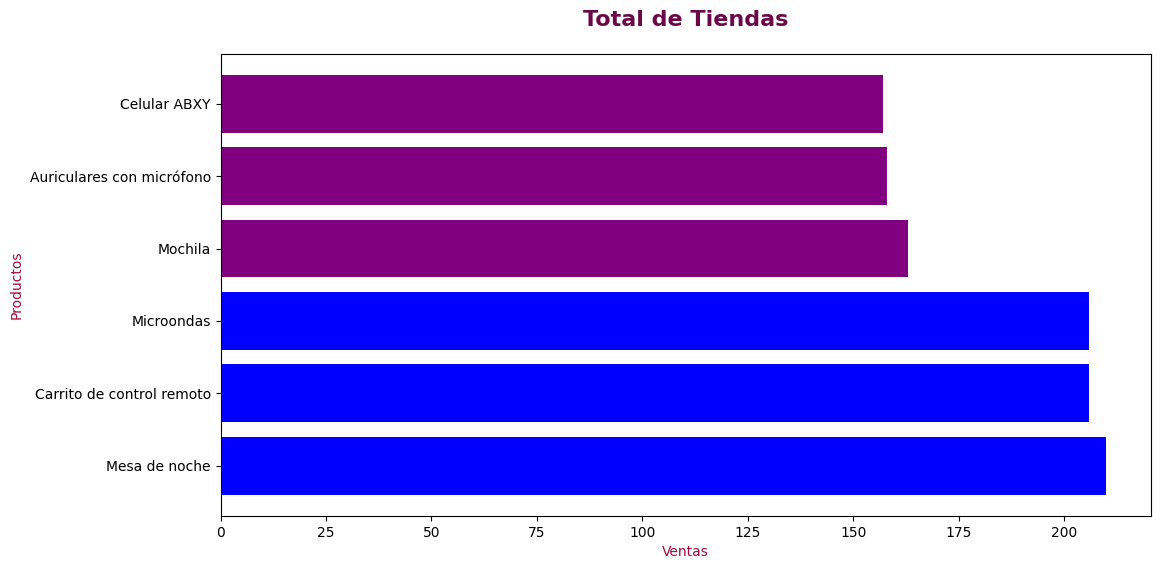

In [ ]:
print("Tienda Total")
# Using the combined DataFrame 'tiendas3' instead of the list 'tiendas4'
productosTt = pd.Series(tiendas3['Producto'])
frecuenciaTt = productosTt.value_counts() # Use productosTt here
productos_mas_vendidosTt = frecuenciaTt.head(3).reset_index()
productos_mas_vendidosTt.columns = ["Productos", "Ventas"]
productos_menos_vendidosTt = frecuenciaTt.tail(3).reset_index() # Use frecuenciaTt here
productos_menos_vendidosTt.columns = ["Productos", "Ventas"]
print("Productos más vendidos a nivel total:")
print(productos_mas_vendidosTt)
print("\nProductos menos vendidos a nivel total:")
print(f'\n {productos_menos_vendidosTt}')


fig, axs = plt.subplots(figsize = (12,6))

axs.barh(productos_mas_vendidosTt['Productos'], productos_mas_vendidosTt["Ventas"], color = ["blue"])
axs.barh(productos_menos_vendidosTt['Productos'], productos_menos_vendidosTt['Ventas'], color = ["purple"])
axs.set_xlabel("Ventas",
                fontsize=10,
                #fontweight='bold',
                color='#A40A3C',
                loc='center')
axs.set_ylabel("Productos",
                fontsize=10,
                #fontweight='bold',
                color='#A40A3C',
                loc='center')
axs.set_title("Total de Tiendas",
          fontsize=16,
          fontweight='bold',
          color='#6B0848',
          loc='center',
          pad=20)
plt.show()


# 5. Envío promedio por tienda

In [ ]:
def promedio_envio(envios):
  return sum(envios)//len(envios)

26018
25216
24805
23459
[26018.0, 25216.0, 24805.0, 23459.0]


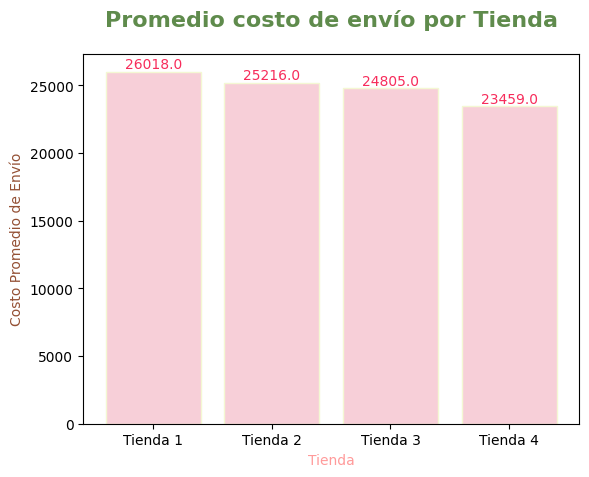

In [ ]:
promedio_tienda1 = promedio_envio(tienda['Costo de envío'])
print(int(promedio_tienda1))
promedio_tienda2= promedio_envio(tienda2['Costo de envío'])
print(int(promedio_tienda2))
promedio_tienda3= promedio_envio(tienda3['Costo de envío'])
print(int(promedio_tienda3))
promedio_tienda4= promedio_envio(tienda4['Costo de envío'])
print(int(promedio_tienda4))
promedios_envios = [promedio_tienda1,promedio_tienda2,promedio_tienda3,promedio_tienda4]
print(promedios_envios)
tiendas_name= ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

# Crear gráfico de barras
plt.bar(tiendas_name, promedios_envios, color='#F7CFD8',edgecolor = '#F4F8D3', width = 0.8)
# Etiquetas y título
plt.title("Promedio costo de envío por Tienda",
          fontsize=16,
          fontweight='bold',
          color='#5F8B4C',
          loc='center',
          pad=20)
plt.xlabel("Tienda",
          fontsize=10,
          #fontweight='bold',
          color='#FF9A9A',
          loc='center')

plt.ylabel("Costo Promedio de Envío",
          fontsize=10,
          #fontweight='bold',
          color='#945034',
          loc='center')

# Mostrar valores sobre las barras
for i, val in enumerate(promedios_envios):
    plt.text(i, val + 0.1, round(val, 2), ha='center', va='bottom', color= '#F72C5B')

#plt.tight_layout()
plt.show()

# <font color=Red> **Ánalisis**
---

# <font color=pink> **🔍 Introducción**
---

El propósito de este informe es analizar y comparar el desempeño de las cuatro tiendas —Tienda 1, Tienda 2, Tienda 3 y Tienda 4— con el fin de asesorar al Sr. Juan sobre cuál de ellas representa la mejor opción para comercializar sus productos. Para ello, se evaluaron los siguientes factores clave:



*   Ingresos totales (facturación)
*   Categorías de productos más y menos vendidas
*   Calificaciones promedio de los clientes
*   Productos más y menos vendidos
*   Coste promedio de envío


El análisis se realizó mediante el uso de Python y bibliotecas como Pandas y Matplotlib, con datos reales obtenidos de cada tienda.

# <font color=pink> **📈 Desarrollo del Análisis**

**<font color=#FFDCDC> 💰 1. Ingresos Totales por Tienda**

De acuerdo con la facturación la Tienda 4 genera menos ingresos, lo cual indica un menor volumen de ventas y posiblemente una menor presencia de mercado.

**<font color=#FFDCDC> 📊 2. Categorías de Productos Vendidas**

La categoría general de ventas se enfoca en Muebles y Electrónicos,

Para la tienda 1, la venta total de estas dos categorías es de 913 productos.
Para la tienda 2, la venta total de estas dos categorías es de 864 productos.
Para la tienda 3, la venta total de estas dos categorías es de 950 productos.
Para la tienda 4, la venta total de estas dos categorías es de 931 productos.
Representando la tienda 2 las menosres ventas,

**<font color=#FFDCDC> ⭐ 3. Calificación Promedio de Clientes**

La Tienda 3 se destaca con la mejor calificación promedio, lo cual refleja una buena experiencia del cliente y servicio postventa, mientras que la tienda 1 tiene la menor calificación promedio en servicio al cliente.

**<font color=#FFDCDC> 📦 4. Productos Más y Menos Vendidos**

El producto más vendido del total de todas las tiendas es la mesa de noche con 210 productos vendidos, mientras que el menos vendido es el Celular ABXY con solo 157 ejemplares vendidos

Tienda 3 presenta productos con bajas ventas recurrentes, lo que podría indicar baja rotación o menor visibilidad.

**<font color=#FFDCDC> 🚚 5. Costo Promedio de Envío**

Tienda 4 tiene el menor costo promedio de envío, lo cual es una fortaleza en términos de competitividad de precio final. Sin embargo, la Tienda 1 tiene el mayor costo promedio de envío.


#<font color=pink> **✅ Conclusión y Recomendación**

Tras un análisis exhaustivo de los indicadores clave de desempeño de las cuatro tiendas obtenemos:

| Criterio                                | Tienda 1   | Tienda 2 | Tienda 3                     | Tienda 4   |
| --------------------------------------- | ---------- | -------- | ---------------------------- | ---------- |
| **1. Ingresos totales**                 |✅ **Alta** | Medio    | Alto                         | Bajo       |
| **2. Ventas en Muebles + Electrónicos** | 913        | 864      | **950**                      | 931        |
| **3. Calificación promedio**            | ❌ Baja     | Media    | ✅ **Alta**                   | Media      |
| **4. Rotación de productos**            | Media      | Media    | ❌ Productos con bajas ventas | Media      |
| **5. Costo promedio de envío**          | ❌ Alto     | Medio    | Medio                        | ✅ **Bajo** |

Por lo que concluimos que la tienda 1 es la mejor opción para que el Sr Juan venda

📌 Justificación:
Mayor facturación total, lo que indica una alta demanda.

Menor calificación promedio por cliente, reflejo poca confiabilidad.

Menor volumen de ventas en productos clave.

Costo de envío promedio alto, sin emabrgo, los ingresos no compensan este factor.


# <font color=pink> **📝 Recomendación Final:**

Se recomienda al Sr. Juan vincularse con Tienda 3 para comercializar sus productos, ya que esta tienda ofrece el mejor balance entre volumen de ventas, reputación del cliente y diversidad de productos vendidos, lo cual maximiza las probabilidades de éxito comercial.

# <font color=yellow> **Actividad Extra:**


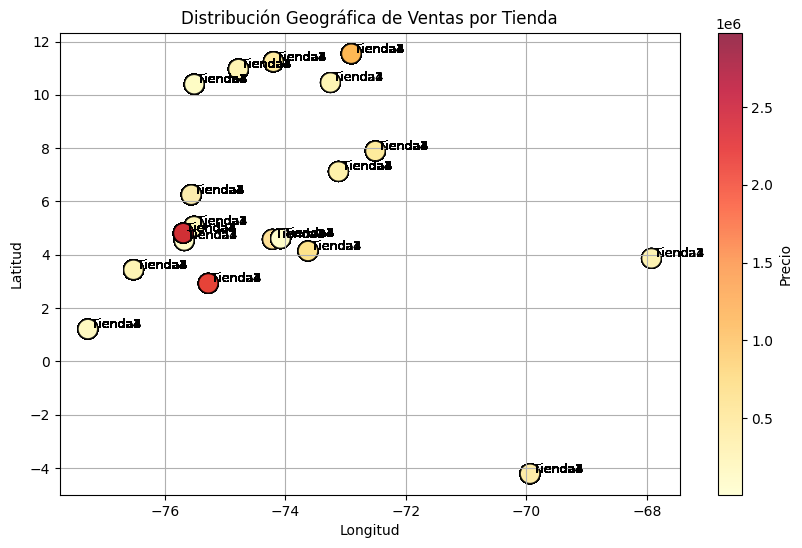

In [ ]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    Tiendas['lon'], Tiendas['lat'],
    c=Tiendas['Precio'], cmap='YlOrRd', s=200, alpha=0.8, edgecolor='k'
)

# Etiquetas
for i, row in Tiendas.iterrows():
    plt.text(row['lon'] + 0.05, row['lat'] + 0.05, row['Tienda'], fontsize=9)

plt.colorbar(sc, label='Precio')
plt.title("Distribución Geográfica de Ventas por Tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()
